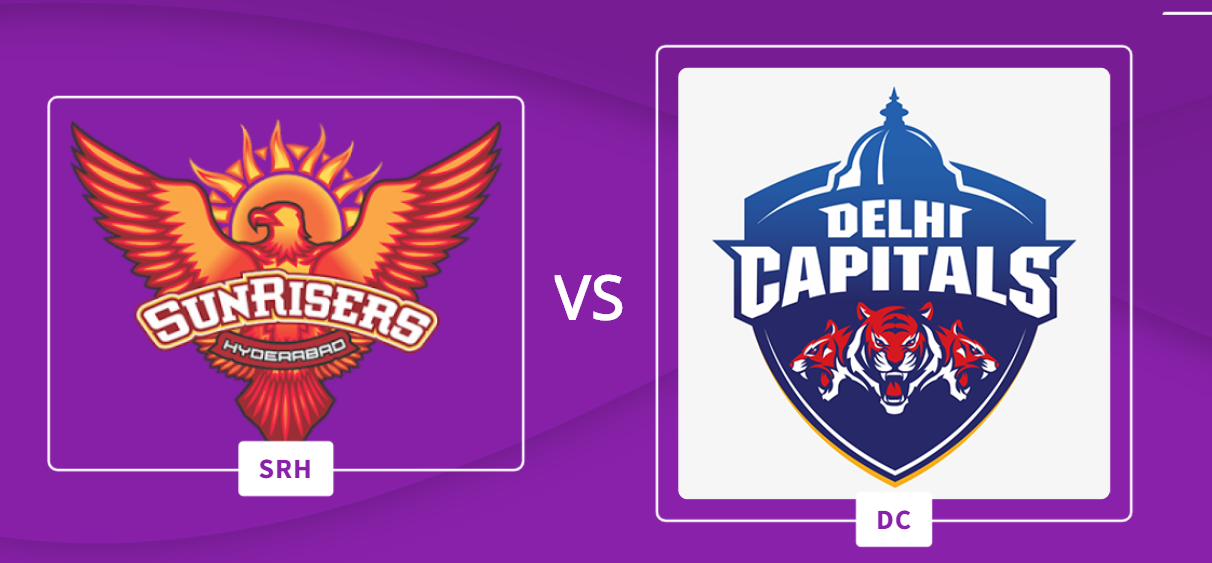

In [90]:
#!pip install bqplot
#!pip install ipywidgets
#!pip install ipympl
#!jupyter labextension install @jupyter-widgets/jupyterlab-manager
#!jupyter nbextension install --user --py widgetsnbextension
#!jupyter nbextension enable --user --py widgetsnbextension
#!pip install plotly
#!pip install cufflinks


import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import ipywidgets as widgets
import plotly.express as px
import plotly.graph_objects as go
import bqplot
from bqplot import Pie
from collections import Counter
from bqplot import DateScale, LinearScale, Lines, Axis, Figure
from bqplot import Tooltip
import cufflinks as cf
from matplotlib.patches import ConnectionPatch
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))


from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
pd.set_option('display.max_columns', 50)
%matplotlib widget


In [91]:
matches = pd.read_csv("matches.csv")
deliveries =  pd.read_csv("deliveries.csv")
IPL_data = pd.merge(deliveries, matches[['id','season', 'team1', 'team2', 'toss_winner', 'toss_decision','winner','result', 'dl_applied','win_by_runs','win_by_wickets', 'venue' ]], 
                    left_on='match_id', right_on='id')

In [333]:
# Squads
##############################################################################################################################
SRH_batsmen = ['J Bairstow', 'DA Warner', 'MK Pandey', 'V Shankar','JO Holder', 'A Samad', 'P Garg']
# Samad and Garg no data available - score on an average 20 in 10-15 balls 
# 'KS Williamson' injured hence will not likely to play

SRH_bowlers = ['Sandeep Sharma', 'K Ahmed', 'Rashid Khan', 'V Shankar', 'JO Holder', 'T Natarajan', 'S Nadeem']
# powerplay bowling sequence : Sandeep Sharma -  Holder - Sandeep Sharma - Holder - Sandeep Sharma - T Natarajan/ V shankar
# mid overs: R Khan, V Shankar
# death overs: Ntarajan, Holder, K Ahmed
##############################################################################################################################

DC_batsmen  = ['P Shaw', 'S Dhawan', 'AM Rahane', 'SS Iyer', 'S Hetmyer', 'MP Stoinis', 'RR Pant']
# Opening : P Shaw/AM Rahane

DC_bowlers = ['K Rabada', 'AR Patel', 'R Ashwin', 'MP Stoinis']
# No data for Nortje, T Deshpande
# powerplay bowling sequence : Rabada(2 overs) - Nortje(2) - T Deshpande (1) - A Patel(1)
# Death overs: Rabada, Nortje, Deshpande

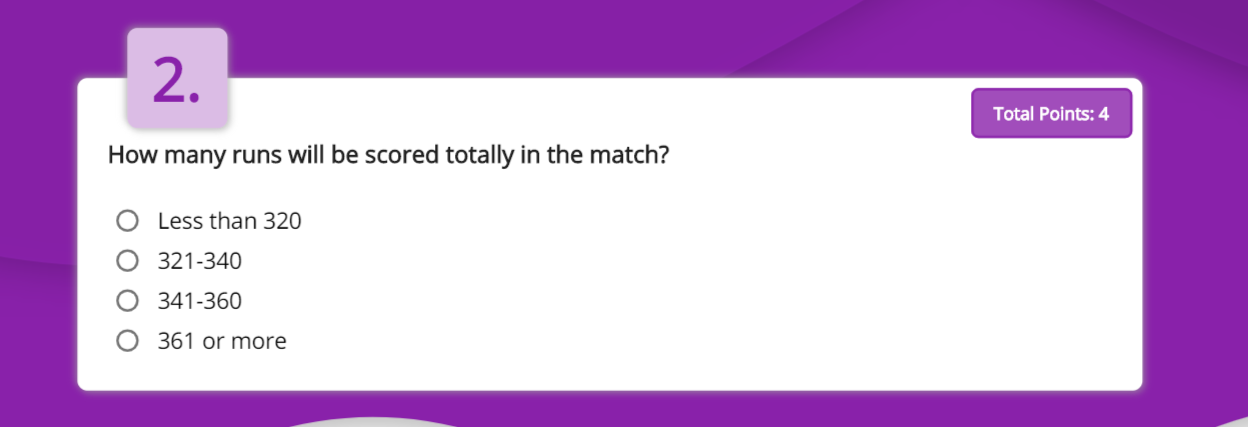

## 2.1

In [336]:
srh_dc = deliveries[(deliveries.batsman.isin(SRH_batsmen)) | (deliveries.batsman.isin(DC_batsmen))]

def total_runs(data):
    x = data.groupby(['match_id', 'batsman'])['batsman_runs'].count().reset_index(name = "balls_faced")
    y = data.groupby(['match_id', 'batsman'])['batsman_runs'].sum().reset_index(name = "runs_scored")
    x["runs_scored"] = y.runs_scored
    for i in x.batsman.unique():
        b.append(i)
        balls.append( round(x[x.batsman == i].balls_faced.mean(),1) )
        runs.append( round(x[x.batsman == i].runs_scored.mean(),1) )
        
b=[]; balls = [];runs=[]

total_runs(srh_dc)

# Adding following data manually as Data not available in the dataset

#Garg runs scored in IPL2020 [0(1 ball), 3(5), 4(7), 8(7), 12(23), 15(8), 16(18), 51(26)]-> 
#runs scored mean =13.6, median 10
#balls faced: mean = 10.6, median 7.5
b.append("P Garg");balls.append(13);runs.append(7.5)

# Samad runs scored in IPL2020 [7(5 balls), 8(7), 8(6), 12(7), 20(9), 23(15)]
# runs scored mean =13, meadian =10
# balls faced mean = 8.16, median = 7
b.append("A Samad");balls.append(7);runs.append(10)

srh_dc_bats = pd.DataFrame(list(zip(b, balls, runs)), 
               columns =['batsman','balls_faced','runs_scored'])

display_side_by_side([srh_dc_bats[srh_dc_bats.batsman.isin(SRH_batsmen)], srh_dc_bats[srh_dc_bats.batsman.isin(DC_batsmen)]], 
                     [" 1) Average number of Balls faced and Runs scored by SRH batsmen. Samad And Garg are not available in Dataset but both score on an average 20 runs in 10-15 balls",
                    " 2) Average number of Balls faced and Runs scored by DC batsmen"])

print("runs scored by SRH would be: ", srh_dc_bats[srh_dc_bats.batsman.isin(SRH_batsmen)].runs_scored.sum())
print("runs scored by DC would be: ", srh_dc_bats[srh_dc_bats.batsman.isin(DC_batsmen)].runs_scored.sum())

,batsman,balls_faced,runs_scored
0,DA Warner,27.000000,37.600000
4,MK Pandey,20.400000,24.100000
5,V Shankar,15.900000,21.300000
8,JO Holder,6.400000,7.600000
11,J Bairstow,29.300000,46.800000
12,P Garg,13.000000,7.500000
13,A Samad,7.000000,10.000000
,batsman,balls_faced,runs_scored
1,S Dhawan,23.900000,29.300000
2,AM Rahane,24.400000,29.200000


runs scored by SRH would be:  154.89999999999998
runs scored by DC would be:  182.29999999999998


In [339]:
# Rahane / Shaw Optional
print("Runs scored in both the innings will be : ",srh_dc_bats.runs_scored.sum() - 24) # Excluding Shaw's runs


Runs scored in both the innings will be :  313.20000000000005


## 2.2 Venue wise score

In [340]:
venue = 'Dubai International Cricket Stadium'
IPL_venue = IPL_data[IPL_data.venue == venue]
IPL_venue['innings_score'] = IPL_venue.groupby(['match_id'])['total_runs'].cumsum()

IPL_venue_score  = IPL_venue[["match_id","venue", "innings_score"]].groupby(['match_id', "venue"])['innings_score'].max().reset_index()
IPL_venue_score

,match_id,venue,innings_score
0,462,Dubai International Cricket Stadium,231
1,463,Dubai International Cricket Stadium,333
2,467,Dubai International Cricket Stadium,273
3,469,Dubai International Cricket Stadium,364
4,470,Dubai International Cricket Stadium,283
5,475,Dubai International Cricket Stadium,251
6,477,Dubai International Cricket Stadium,329


In [341]:
IPL_venue_score.innings_score.describe()

count      7.000000
mean     294.857143
std       48.340558
min      231.000000
25%      262.000000
50%      283.000000
75%      331.000000
max      364.000000
Name: innings_score, dtype: float64

## Conclusion: Combined score of both the innings will be less than 320

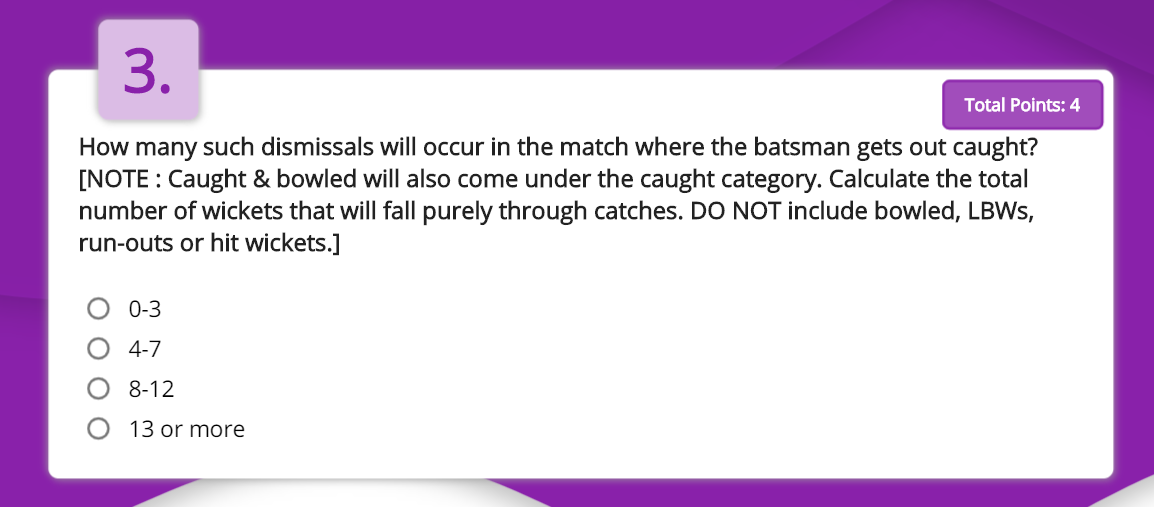

## 3.1: overall 

In [342]:
batsmen = deliveries[(deliveries.batsman.isin(SRH_batsmen)) | (deliveries.batsman.isin(DC_batsmen))]
batsmen.player_dismissed.fillna(0, inplace = True)
batsmen.dismissal_kind.fillna(0, inplace = True)
#batsmen['player_dismissed'].loc[batsmen['player_dismissed'] != 0] = 1

def dismissal_type(data):
    for i in data.batsman.unique():
        player.append(i)
        x= data[data.batsman == i]
        total_matches.append(len(x.match_id.unique()))
        y = x[x.player_dismissed == i]
        z = x[(x.player_dismissed == i) & ((x.dismissal_kind == "caught") | (x.dismissal_kind == "caught and bowled"))]
        z1  = x[(x.player_dismissed == i) & ((x.dismissal_kind == "run out") | (x.dismissal_kind == "bowled") 
                                             | (x.dismissal_kind == "stumped") | (x.dismissal_kind == "lbw"))]
        out_matches.append(len(y.match_id.unique()))
        caught.append(len(z.match_id.unique()))
        other.append(len(z1.match_id.unique()))
   
    
player = [];caught = [];other = []; total_matches = []; out_matches = [] 
dismissal_type(batsmen)

dismissal = pd.DataFrame(list(zip(player, total_matches, out_matches, caught, other)), 
               columns =['batsman','total_matches','out_matches', 'caught', 'others']) 

dismissal["notout_percentage"] =  ((dismissal.total_matches - dismissal.out_matches)/dismissal.total_matches)*100
dismissal["caught_percentage"] = (dismissal.caught/dismissal.out_matches)*100
dismissal["other_reasons_percentage"] = (dismissal.others/dismissal.out_matches)*100


## 3.2 Head to head dismissal record

In [343]:
batsmen_HH = deliveries[((deliveries.batsman.isin(SRH_batsmen)) & (deliveries.bowler.isin(DC_bowlers))) | 
                       ((deliveries.batsman.isin(DC_batsmen)) & (deliveries.bowler.isin(SRH_bowlers)))]

player = [];caught = [];other = []; total_matches = []; out_matches = [] 
dismissal_type(batsmen_HH)

dismissal_HH = pd.DataFrame(list(zip(player, total_matches, out_matches, caught, other)), 
               columns =['batsman','total_matches','out_matches', 'caught', 'others'])   
    
dismissal_HH["notout_percentage"] =  ((dismissal_HH.total_matches - dismissal_HH.out_matches)/dismissal_HH.total_matches)*100
dismissal_HH["caught_percentage"] = (dismissal_HH.caught/dismissal_HH.out_matches)*100
dismissal_HH["other_reasons_percentage"] = (dismissal_HH.others/dismissal_HH.out_matches)*100
display_side_by_side([dismissal[dismissal.batsman.isin(SRH_batsmen)], dismissal[dismissal.batsman.isin(DC_batsmen)],
                      dismissal_HH[dismissal_HH.batsman.isin(SRH_batsmen)], dismissal_HH[dismissal_HH.batsman.isin(DC_batsmen)]], 
                     [" 1) Dismissal stats of SRH batsmen"," 2) dismissal stats of DC batsmen",
                      " 3) Dismissal stats of SRH batsmen again DC bowlers"," 4) dismissal stats of DC batsmen against SRH bowlers"])


,batsman,total_matches,out_matches,caught,others,notout_percentage,caught_percentage,other_reasons_percentage
0,DA Warner,126,107,70,36,15.079365,65.420561,33.644860
4,MK Pandey,119,95,61,34,20.168067,64.210526,35.789474
5,V Shankar,27,17,16,1,37.037037,94.117647,5.882353
8,JO Holder,5,5,3,2,0.000000,60.000000,40.000000
11,J Bairstow,10,8,6,2,20.000000,75.000000,25.000000
,batsman,total_matches,out_matches,caught,others,notout_percentage,caught_percentage,other_reasons_percentage
1,S Dhawan,158,131,81,49,17.088608,61.832061,37.404580
2,AM Rahane,132,111,76,35,15.909091,68.468468,31.531532
3,RR Pant,54,47,32,15,12.962963,68.085106,31.914894
6,MP Stoinis,25,15,11,4,40.000000,73.333333,26.666667


### If we conside P Garag and Samad's dismissal kind in IPL2020<br>
### Garg =  matches played= 8, not out  = 1, caught = 3, other reasons = 3<br>Samad =  matches played=  6, not out = 2, caught = 4, others = 0<br> Hence we need to add Samad' dismissal kind in our total



## Number of batsmen with dismissal kind "Caught" will be 8-12

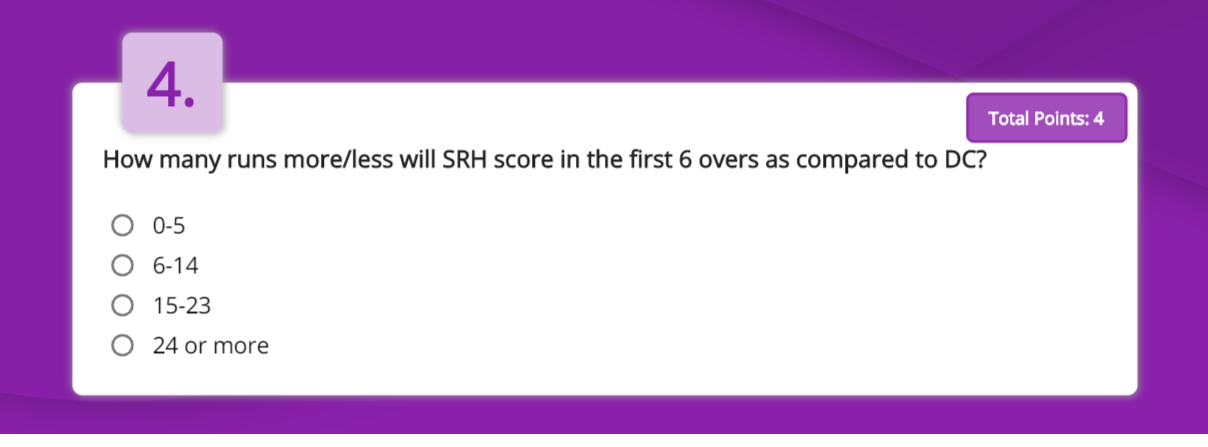

## 4.1: Powerplay Batsmen of SRH and DC and their performances in 1st 6 overs

In [344]:
SRH_batsmen_pp = ['J Bairstow', 'DA Warner', 'MK Pandey']
DC_batsmen_pp  = ['P Shaw', 'S Dhawan', 'AM Rahane', 'SS Iyer'] # here P Shaw or AM Rahane are optional - any one of them will play today

In [345]:
runs_pp = deliveries[((deliveries.batsman.isin(SRH_batsmen_pp)) | (deliveries.batsman.isin(DC_batsmen_pp))) & (deliveries.over <= 6)]
rp1 = runs_pp.groupby(['match_id', 'batsman'])['batsman_runs'].sum().reset_index(name  = 'runs_scored')
rp2 = runs_pp.groupby(['match_id', 'batsman'])['batsman_runs'].count().reset_index(name  = 'balls_faced')
rp2["runs_scored"] = rp1.runs_scored

def powerplay_score(runs_data):
    for i in runs_data.batsman.unique():
        bt.append(i)
        bt_b.append(round(runs_data[runs_data.batsman == i].balls_faced.mean(),1))
        bt_r.append(round(runs_data[runs_data.batsman == i].runs_scored.mean(),1))
    
bt = []; bt_b = [];bt_r =[]
powerplay_score(rp2)
powerplay_runs = pd.DataFrame(list(zip(bt, bt_b, bt_r)), 
               columns =['batsman','balls_faced','runs_scored'])   

powerplay_runs1 = powerplay_runs[powerplay_runs.batsman.isin(SRH_batsmen_pp)] #SRH
powerplay_runs2 = powerplay_runs[powerplay_runs.batsman.isin(DC_batsmen_pp)] #DC 

display_side_by_side([powerplay_runs1, powerplay_runs2],
                     ["1)Runs scored in powerplay by SRH Batsmen", "2) Runs scored in powerplay by DC batsmen (Note: Shaw/ Rahane any one of them will play in powerplay)"]) 

# let us consider AM Rahane will play insted of P Shaw
display_side_by_side([powerplay_runs1.cumsum(), powerplay_runs2[powerplay_runs2.batsman != "P Shaw"].cumsum()],
                     ["1)Runs scored in powerplay by SRH Batsmen in poweplay (Cumulative)", "2) Runs scored in powerplay by DC batsmen(Cumulative) [Note: Consider Rahane wil play insted of P Shaw]"])  

# let us consider P Shaw  will play insted of AM Rahane
display_side_by_side([powerplay_runs1.cumsum(), powerplay_runs2[powerplay_runs2.batsman != "AM Rahane"].cumsum()],
                     ["1)Runs scored in powerplay by SRH Batsmen in poweplay (Cumulative)", "2) Runs scored in powerplay by DC batsmen(Cumulative) [Note: Consider Shaw wil play insted of AM Rahane]"])    

,batsman,balls_faced,runs_scored
0,DA Warner,14.600000,19.700000
3,MK Pandey,9.300000,10.000000
6,J Bairstow,13.700000,21.200000
,batsman,balls_faced,runs_scored
1,S Dhawan,13.400000,16.000000
2,AM Rahane,13.400000,15.500000
4,SS Iyer,10.100000,10.800000
5,P Shaw,12.000000,16.600000


,batsman,balls_faced,runs_scored
0,DA Warner,14.600000,19.700000
3,DA WarnerMK Pandey,23.900000,29.700000
6,DA WarnerMK PandeyJ Bairstow,37.600000,50.900000
,batsman,balls_faced,runs_scored
1,S Dhawan,13.400000,16.000000
2,S DhawanAM Rahane,26.800000,31.500000
4,S DhawanAM RahaneSS Iyer,36.900000,42.300000


,batsman,balls_faced,runs_scored
0,DA Warner,14.600000,19.700000
3,DA WarnerMK Pandey,23.900000,29.700000
6,DA WarnerMK PandeyJ Bairstow,37.600000,50.900000
,batsman,balls_faced,runs_scored
1,S Dhawan,13.400000,16.000000
4,S DhawanSS Iyer,23.500000,26.800000
5,S DhawanSS IyerP Shaw,35.500000,43.400000


In [346]:
print("diffremce between 1st 6 overs score is in the range :",
      round(powerplay_runs1.cumsum().runs_scored.max()- powerplay_runs2[powerplay_runs2.batsman != "AM Rahane"].cumsum().runs_scored.max(),1)
     ," - ",
     round(powerplay_runs1.cumsum().runs_scored.max()- powerplay_runs2[powerplay_runs2.batsman != "P Shaw"].cumsum().runs_scored.max(),1)
     )

diffremce between 1st 6 overs score is in the range : 7.5  -  8.6


## 4.2 : Head to Head

In [347]:
#Powerplay bowlers of both the teams
SRH_bowlers_pp = ['Sandeep Sharma', 'JO Holder', 'T Natarajan', 'V Shankar'] # T Natarajan/ V shankar optional
DC_bowlers_pp = ['K Rabada', 'AR Patel'] #Nortje(2 overs) - T Deshpande (1 over) data not availabe


In [348]:
runs_pp_ = deliveries[(((deliveries.batsman.isin(SRH_batsmen_pp)) & (deliveries.bowler.isin(DC_bowlers_pp))) | 
                     ((deliveries.batsman.isin(DC_batsmen_pp)) & (deliveries.bowler.isin(SRH_bowlers_pp))))
                     & (deliveries.over <= 6)]
rp1_ = runs_pp_.groupby(['match_id', 'batsman'])['batsman_runs'].sum().reset_index(name  = 'runs_scored')
rp2_ = runs_pp_.groupby(['match_id', 'batsman'])['batsman_runs'].count().reset_index(name  = 'balls_faced')
rp2_["runs_scored"] = rp1_.runs_scored

bt = []; bt_b = [];bt_r =[]
powerplay_score(rp2_)
powerplay_runs_ = pd.DataFrame(list(zip(bt, bt_b, bt_r)), 
               columns =['batsman','balls_faced','runs_scored'])   
ppr1 = powerplay_runs_[powerplay_runs_.batsman.isin(SRH_batsmen_pp)] #SRH
ppr2 = powerplay_runs_[powerplay_runs_.batsman.isin(DC_batsmen_pp)] #DC

display_side_by_side([ppr1, ppr2],
                     ["1) Runs scored in powerplay by SRH Batsmen against DC bowlers", "2) Runs scored in powerplay by DC batsmen against SRH bowlers"]) 


,batsman,balls_faced,runs_scored
2,DA Warner,5.800000,10.800000
4,MK Pandey,3.000000,1.000000
6,J Bairstow,10.500000,14.000000
,batsman,balls_faced,runs_scored
0,AM Rahane,7.200000,5.700000
1,S Dhawan,6.200000,8.400000
3,SS Iyer,5.500000,2.800000
5,P Shaw,5.000000,10.500000


In [349]:
ppr2[ppr2.batsman !="P Shaw" ].cumsum()

,batsman,balls_faced,runs_scored
0,AM Rahane,7.2,5.7
1,AM RahaneS Dhawan,13.4,14.1
3,AM RahaneS DhawanSS Iyer,18.9,16.9


In [350]:
ppr1.cumsum()

,batsman,balls_faced,runs_scored
2,DA Warner,5.8,10.8
4,DA WarnerMK Pandey,8.8,11.8
6,DA WarnerMK PandeyJ Bairstow,19.3,25.8


### Even if we compare 1st 20 balls the difference hardly greater than 10<br>But, results in section 4.2 are not that much significant as main bowler's data is not available in this dataset.
Hence we, will go with outcomes of section 4.1

## Conclusion: From the outcome of section 4.1 the diffrence in the scores of both teams in 1st 6 overs will be 6-14

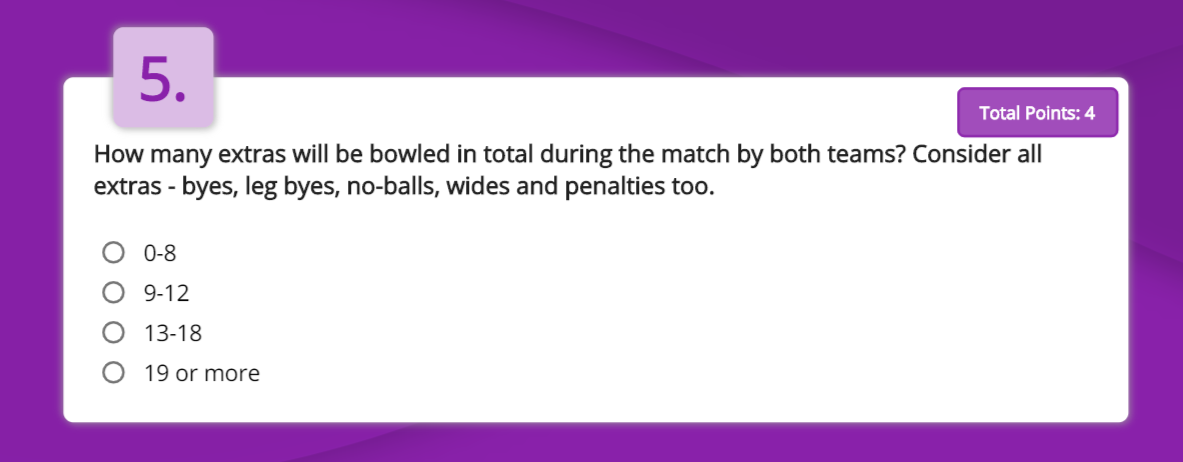

In [351]:
extras = deliveries[(deliveries.bowler.isin(DC_bowlers))]
e1 = extras.groupby(['match_id','bowler'])['bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs', 'wide_runs'].sum().reset_index()
e1["extras"] = e1.bye_runs + e1.legbye_runs + e1.noball_runs + e1.penalty_runs + e1.wide_runs

SRH_bowlers_extras = ['Sandeep Sharma', 'K Ahmed', 'Rashid Khan', 'JO Holder', 'T Natarajan']
e2 = deliveries[(deliveries.bowler.isin(SRH_bowlers_extras))].groupby(['match_id','bowler'])['bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs', 'wide_runs'].sum().reset_index()
e2["extras"] = e2.bye_runs + e2.legbye_runs + e2.noball_runs + e2.penalty_runs + e2.wide_runs


def extras_runs(data):
    for i in data.bowler.unique():
        bowl.append(i)
        e = data[data.bowler == i]
        bye_runs.append(e.bye_runs.mean())
        legbye_runs.append(e.legbye_runs.mean())
        noball_runs.append(e.noball_runs.mean())
        penalty_runs.append(e.penalty_runs.max())
        wide_runs.append(e.wide_runs.mean())

bowl = [];bye_runs = [];legbye_runs =[]; noball_runs=[];penalty_runs = [];wide_runs = []
extras_runs(e1)

extra_runs_DC = pd.DataFrame(list(zip(bowl, bye_runs, legbye_runs, noball_runs, penalty_runs, wide_runs)), 
               columns =['bowler', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs', 'wide_runs'])
extra_runs_DC["extras"]  = extra_runs_DC.bye_runs + extra_runs_DC.legbye_runs + extra_runs_DC.noball_runs + extra_runs_DC.penalty_runs + extra_runs_DC.wide_runs

#######################################################################################################################
#SRH
bowl = [];bye_runs = [];legbye_runs =[]; noball_runs=[];penalty_runs = [];wide_runs = []
extras_runs(e2)

extra_runs_SRH = pd.DataFrame(list(zip(bowl, bye_runs, legbye_runs, noball_runs, penalty_runs, wide_runs)), 
               columns =['bowler', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs', 'wide_runs'])
extra_runs_SRH["extras"]  = extra_runs_SRH.bye_runs + extra_runs_SRH.legbye_runs + extra_runs_SRH.noball_runs + extra_runs_SRH.penalty_runs + extra_runs_SRH.wide_runs


display_side_by_side([extra_runs_SRH[["bowler", "extras"]], extra_runs_DC[["bowler", "extras"]]],["1) SRH", "2) DC"])

,bowler,extras
0,Rashid Khan,0.934783
1,Sandeep Sharma,1.382353
2,T Natarajan,1.166667
3,JO Holder,1.727273
4,K Ahmed,2.000000
,bowler,extras
0,AR Patel,1.000000
1,MP Stoinis,1.041667
2,K Rabada,2.388889
3,R Ashwin,1.227941


In [325]:
print("number of extras will be ", round(extra_runs_SRH.extras.sum(),1) +  round(extra_runs_DC.extras.sum(),1))

number of extras will be  12.9


## Extras will be in between 9 -12

# Question 1: Who will win the match?

In [355]:
bowling_avg = deliveries[(deliveries.bowler.isin(DC_bowlers)) | (deliveries.bowler.isin(SRH_bowlers))]
bowling_avg.player_dismissed.fillna(0, inplace  = True)
bowling_avg['player_dismissed'].loc[bowling_avg['player_dismissed'] != 0] = 1

b_avg1 = bowling_avg.groupby(['bowler'])['player_dismissed'].sum().reset_index(name  = "wickets")
t_b =  bowling_avg.groupby(['bowler'])['batsman_runs'].count().reset_index(name  = "balls_bowled")
b_avg1["balls_bowled"] = t_b.balls_bowled
b_avg1["bowling_avg"] = b_avg1.wickets/b_avg1.balls_bowled


display_side_by_side([b_avg1[b_avg1.bowler.isin(SRH_bowlers)], b_avg1[b_avg1.bowler.isin(DC_bowlers)]], 
                     [" 1) bowling average of SRH bowlers", " 2) bowling average of DC bowlers"])


## Batting averages of all the batsmen

batsmen_runs_all =deliveries[(deliveries.batsman.isin(DC_batsmen)) | (deliveries.batsman.isin(SRH_batsmen))]
b1_all = batsmen_runs_all.groupby(['batsman'])['batsman_runs'].sum().reset_index(name = "total_runs")
b = [];b_avg = [];tm = [];runs  = []
for i in batsmen_runs_all.batsman.unique():
    x = batsmen_runs_all[batsmen_runs_all.batsman == i]
    x.player_dismissed.fillna(0, inplace = True)
    x['player_dismissed'].loc[x['player_dismissed'] != 0] = 1
    #print(x[['match_id','player_dismissed']])
    y = x.groupby(['match_id'])['player_dismissed'].sum().reset_index(name = "out_count")
    z = x.groupby(['match_id'])['batsman_runs'].sum().reset_index(name = "runs")
    #print(y)
    b.append(i)
    b_avg.append(y.out_count.sum())
    runs.append(z.runs.sum())
    tm.append(y.shape[0])
    
bat_avg = pd.DataFrame(list(zip(b, b_avg, tm, runs)), 
               columns =['batsman','matches_out','total_matches', 'total_runs'])    

bat_avg["batting_average"] = bat_avg.total_runs/bat_avg.matches_out
#bat_avg[bat_avg.batsman.isin(SRH_batsmen)]
display_side_by_side([bat_avg[bat_avg.batsman.isin(SRH_batsmen)], bat_avg[bat_avg.batsman.isin(DC_batsmen)]], [" 1) batting average of SRH batsmen", " 2) batting average of DC batsmen"])

,bowler,wickets,balls_bowled,bowling_avg
1,JO Holder,8,228,0.035088
2,K Ahmed,20,241,0.082988
6,Rashid Khan,60,1106,0.054250
7,S Nadeem,47,1283,0.036633
8,Sandeep Sharma,90,1546,0.058215
9,T Natarajan,2,82,0.024390
10,V Shankar,2,92,0.021739
,bowler,wickets,balls_bowled,bowling_avg
0,AR Patel,76,1745,0.043553
3,K Rabada,36,434,0.082949


,batsman,matches_out,total_matches,total_runs,batting_average
0,DA Warner,114,126,4741,41.587719
4,MK Pandey,96,119,2872,29.916667
5,V Shankar,17,27,574,33.764706
8,JO Holder,5,5,38,7.600000
11,J Bairstow,8,10,468,58.500000
,batsman,matches_out,total_matches,total_runs,batting_average
1,S Dhawan,137,158,4632,33.810219
2,AM Rahane,117,132,3850,32.905983
3,RR Pant,49,54,1792,36.571429
6,MP Stoinis,15,25,482,32.133333


## Performance indexes of batsmen
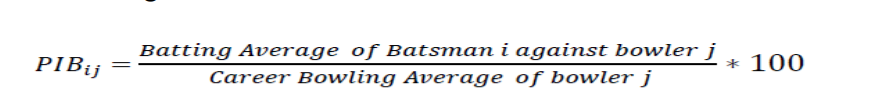

In [372]:
# Performance indexes of KXIP batsmen against KKR bowlers
batsman = [];bowler =[]; b_avg= []; runs= []; tm = []
def performance_indexes_batsmen(batsman_list, bowler_list):
    
    for i in batsman_list:
        pi1 = deliveries[(deliveries.batsman == i) & (deliveries.bowler.isin(bowler_list))]
        pi1.player_dismissed.fillna(0, inplace = True)
        pi1['player_dismissed'].loc[pi1['player_dismissed'] != 0] = 1
        for j in pi1.bowler.unique():
            x = pi1[pi1.bowler == j]
            batsman.append(i)
            bowler.append(j)
            y = x.groupby(['match_id'])['player_dismissed'].sum().reset_index(name = "out_count")
            z = x.groupby(['match_id'])['batsman_runs'].sum().reset_index(name = "runs")
            b_avg.append(y.out_count.sum())
            runs.append(z.runs.sum())
            tm.append(y.shape[0])
            
performance_indexes_batsmen(SRH_batsmen, DC_bowlers)
SRH_bat_avg = pd.DataFrame(list(zip(batsman, bowler, b_avg, tm, runs)), 
               columns =['batsman','bowler', 'matches_out','total_matches', 'total_runs'])      
SRH_bat_avg["batting_average"] = SRH_bat_avg.total_runs/SRH_bat_avg.matches_out
SRH_bat_avg.replace([np.inf, -np.inf], np.nan, inplace=True)   

bowl_avg = []
for i in SRH_bat_avg.bowler.values:
    bowl_avg.append(b_avg1[b_avg1.bowler == i].bowling_avg.values[0])
    
SRH_bat_avg["bowling_average_bowler"] = bowl_avg
SRH_bat_avg["PIBij"] = SRH_bat_avg.batting_average/SRH_bat_avg.bowling_average_bowler # not multiplying with 100 as bowling average is not in %

#############################################################################################################33
# KKR batsmen's performance indexes
batsman = [];bowler =[]; b_avg= []; runs= []; tm = []
performance_indexes_batsmen(DC_batsmen, SRH_bowlers)

DC_bat_avg = pd.DataFrame(list(zip(batsman, bowler, b_avg, tm, runs)), 
               columns =['batsman','bowler', 'matches_out','total_matches', 'total_runs'])      
DC_bat_avg["batting_average"] = DC_bat_avg.total_runs/DC_bat_avg.matches_out
DC_bat_avg.replace([np.inf, -np.inf], np.nan, inplace=True)   

bowl_avg1 = []
for i in DC_bat_avg.bowler.values:
    bowl_avg1.append(b_avg1[b_avg1.bowler == i].bowling_avg.values[0])
    
DC_bat_avg["bowling_average_bowler"] = bowl_avg1
DC_bat_avg["PIBij"] = DC_bat_avg.batting_average/SRH_bat_avg.bowling_average_bowler # not multiplying with 100 as bowling average is not in %
display_side_by_side([SRH_bat_avg, DC_bat_avg], [" 1) Performance indexes of SRH batsmen against DC Bowlers", " 2) Performance indexes of DC batsmen against SRH Bowlers"])

,batsman,bowler,matches_out,total_matches,total_runs,batting_average,bowling_average_bowler,PIBij
0,J Bairstow,AR Patel,0,2,19,nan,0.043553,nan
1,J Bairstow,K Rabada,0,2,21,nan,0.082949,nan
2,DA Warner,AR Patel,2,8,88,44.000000,0.043553,1010.263158
3,DA Warner,K Rabada,2,3,26,13.000000,0.082949,156.722222
4,DA Warner,R Ashwin,3,8,79,26.333333,0.045756,575.516908
5,MK Pandey,AR Patel,2,9,34,17.000000,0.043553,390.328947
6,MK Pandey,K Rabada,1,1,0,0.000000,0.082949,0.000000
7,MK Pandey,R Ashwin,2,11,62,31.000000,0.045756,677.507246
8,V Shankar,AR Patel,1,3,14,14.000000,0.043553,321.447368
9,V Shankar,R Ashwin,1,2,16,16.000000,0.045756,349.681159


## Performance indexes for both the teams bowlers
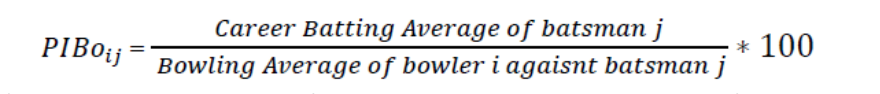

In [359]:
bowls = []; bats = []; wi = []; bb = []
def performance_index_bowlers(bowlers_list, batsmen_list):
    for i in bowlers_list:
        p = deliveries[(deliveries.bowler == i) & (deliveries.batsman.isin(batsmen_list))]
        p.player_dismissed.fillna(0, inplace  = True)
        p['player_dismissed'].loc[p['player_dismissed'] != 0] = 1
        for j in p.batsman.unique():
            bowls.append(i)
            bats.append(j)
            xy = p[p.batsman == j]
            #print(p[p.batsman == j])
            wi.append(xy.player_dismissed.sum())
            bb.append(xy.batsman_runs.count())
        
performance_index_bowlers(SRH_bowlers, DC_batsmen)
SRH_bowlers_p = pd.DataFrame(list(zip(bowls, bats, wi, bb)), 
               columns =['bowler', 'batsman','wickets','balls_bowled'])  
bat_avg_p = []
for i in SRH_bowlers_p.batsman.values:
    bat_avg_p.append(bat_avg[bat_avg.batsman == i].batting_average.values[0])
    
SRH_bowlers_p["bowling_average"] = SRH_bowlers_p.wickets/SRH_bowlers_p.balls_bowled
SRH_bowlers_p["batting_avg"] = bat_avg_p
SRH_bowlers_p["PIBoij"] = SRH_bowlers_p.batting_avg/SRH_bowlers_p.bowling_average
SRH_bowlers_p.replace([np.inf, -np.inf], np.nan, inplace=True)
###################################################################################################################
bowls = []; bats = []; wi = []; bb = []        
performance_index_bowlers(DC_bowlers, SRH_batsmen)

DC_bowlers_p = pd.DataFrame(list(zip(bowls, bats, wi, bb)), 
               columns =['bowler', 'batsman','wickets','balls_bowled'])  
bat_avg_p = []
for i in DC_bowlers_p.batsman.values:
    bat_avg_p.append(bat_avg[bat_avg.batsman == i].batting_average.values[0])
    
DC_bowlers_p["bowling_average"] = DC_bowlers_p.wickets/DC_bowlers_p.balls_bowled
DC_bowlers_p["batting_avg"] = bat_avg_p
DC_bowlers_p["PIBoij"] = DC_bowlers_p.batting_avg/DC_bowlers_p.bowling_average
DC_bowlers_p.replace([np.inf, -np.inf], np.nan, inplace=True)

display_side_by_side([SRH_bowlers_p, DC_bowlers_p], [" 1) Performance indexes of SRH bowlers against DC batsmen", " 2) Performance indexes of DC bowlers against SRH batsmen"])

,bowler,batsman,wickets,balls_bowled,bowling_average,batting_avg,PIBoij
0,Sandeep Sharma,AM Rahane,2,56,0.035714,32.905983,921.367521
1,Sandeep Sharma,S Dhawan,0,44,0.000000,33.810219,nan
2,Sandeep Sharma,SS Iyer,3,35,0.085714,30.070175,350.818713
3,Sandeep Sharma,RR Pant,1,13,0.076923,36.571429,475.428571
4,Sandeep Sharma,P Shaw,1,13,0.076923,25.666667,333.666667
5,K Ahmed,P Shaw,2,13,0.153846,25.666667,166.833333
6,K Ahmed,S Dhawan,1,3,0.333333,33.810219,101.430657
7,K Ahmed,SS Iyer,1,3,0.333333,30.070175,90.210526
8,K Ahmed,RR Pant,1,3,0.333333,36.571429,109.714286
9,K Ahmed,AM Rahane,0,7,0.000000,32.905983,nan


## SRH will win today